In [3]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

**Exercise 1: Monte Carlo - Blackjack Policy Evaluation**

In [15]:

def blackjack_policy(state):
    """Simple policy: Stick if sum >= 18, otherwise hit."""
    player_sum, dealer_card, usable_ace = state
    return 0 if player_sum >= 18 else 1

def monte_carlo_blackjack(env, policy, num_episodes=500000, gamma=1.0):
    """Monte Carlo First-Visit evaluation."""
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)
    V = defaultdict(float)

    for _ in range(num_episodes):
        episode = []
        state, _ = env.reset()
        done = False

        while not done:
            action = policy(state)
            next_state, reward, done, _, _ = env.step(action)
            episode.append((state, reward))
            state = next_state

        G = 0
        visited_states = set()
        for state, reward in reversed(episode):
            G = gamma * G + reward
            if state not in visited_states:
                returns_sum[state] += G
                returns_count[state] += 1
                V[state] = returns_sum[state] / returns_count[state]
                visited_states.add(state)

    return V

def plot_blackjack_value_function(V):
    """Visualizes the state-value function as a heatmap."""
    player_sums = np.arange(12, 22)
    dealer_cards = np.arange(1, 11)
    value_matrix = np.zeros((len(player_sums), len(dealer_cards)))

    for i, ps in enumerate(player_sums):
        for j, dc in enumerate(dealer_cards):
            value_matrix[i, j] = V.get((ps, dc, False), 0)

    plt.figure(figsize=(10, 6))
    sns.heatmap(value_matrix, annot=True, fmt=".2f", xticklabels=dealer_cards, yticklabels=player_sums)
    plt.xlabel("Dealer's Visible Card")
    plt.ylabel("Player's Sum")
    plt.title("Monte Carlo Estimated State-Value Function for Blackjack")
    plt.show()


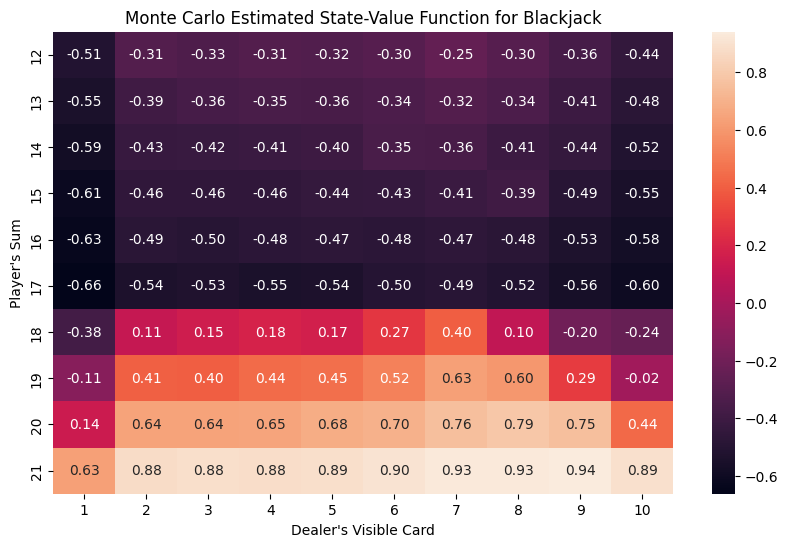

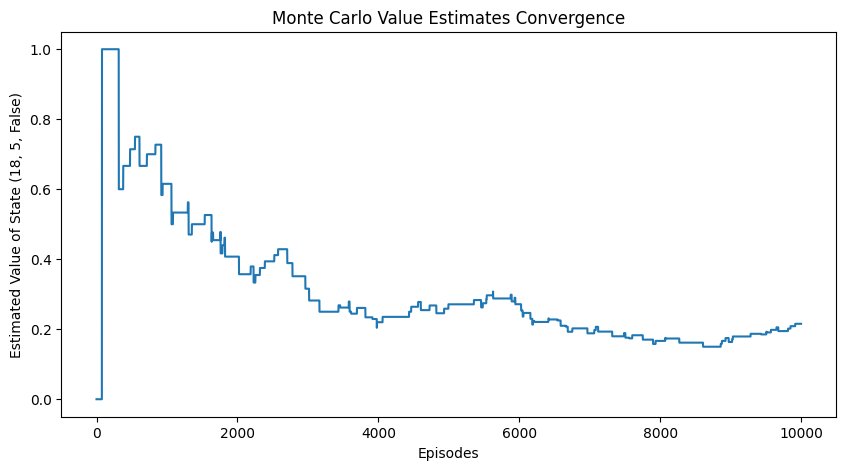

In [16]:
# Running the experiments
env_blackjack = gym.make('Blackjack-v1')
V_blackjack = monte_carlo_blackjack(env_blackjack, blackjack_policy)
plot_blackjack_value_function(V_blackjack)

# Run Monte Carlo convergence tracking
env_blackjack = gym.make('Blackjack-v1')
mc_value_estimates = monte_carlo_convergence(env_blackjack, blackjack_policy)

# Plot Monte Carlo Convergence
plt.figure(figsize=(10, 5))
plt.plot(mc_value_estimates)
plt.xlabel("Episodes")
plt.ylabel("Estimated Value of State (18, 5, False)")
plt.title("Monte Carlo Value Estimates Convergence")
plt.show()

**Exercise 2: Temporal Difference - Cliff Walking with SARSA**

In [17]:
def sarsa(env, num_episodes=5000, alpha=0.1, gamma=0.99, epsilon=0.1):
    """Implements SARSA for Cliff Walking."""
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    for episode in range(num_episodes):
        state, _ = env.reset()
        action = np.random.choice(np.arange(env.action_space.n)) if np.random.rand() < epsilon else np.argmax(Q[state])
        done = False
        total_reward = 0

        while not done:
            next_state, reward, done, _, _ = env.step(action)
            next_action = np.random.choice(np.arange(env.action_space.n)) if np.random.rand() < epsilon else np.argmax(Q[next_state])

            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state, action = next_state, next_action
            total_reward += reward

    return Q

def plot_sarsa_policy(Q, env):
    """Visualizes the learned policy as arrows."""
    policy_arrows = {0: '↑', 1: '→', 2: '↓', 3: '←'}
    nrow, ncol = env.unwrapped.shape
    grid_policy = np.array([policy_arrows[np.argmax(Q[i])] for i in range(env.observation_space.n)])

    print("SARSA Learned Policy:")
    print(grid_policy.reshape(nrow, ncol))

# SARSA Cumulative Reward Plot
def sarsa_cumulative_reward(env, num_episodes=5000, alpha=0.1, gamma=0.99, epsilon=0.1):
    """Tracks cumulative reward over episodes."""
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_per_episode = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        action = np.random.choice(np.arange(env.action_space.n)) if np.random.rand() < epsilon else np.argmax(Q[state])
        done = False
        total_reward = 0

        while not done:
            next_state, reward, done, _, _ = env.step(action)
            next_action = np.random.choice(np.arange(env.action_space.n)) if np.random.rand() < epsilon else np.argmax(Q[next_state])

            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state, action = next_state, next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode

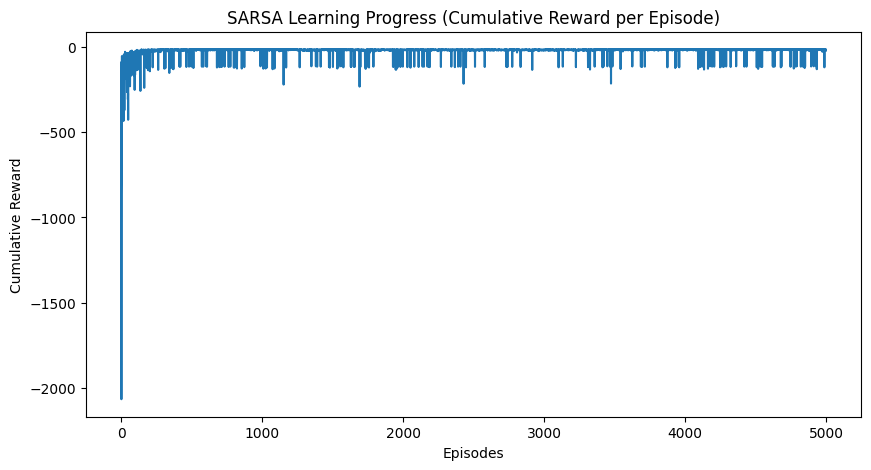

SARSA Learned Policy:
[['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '→' '↑' '→' '↑' '↑' '↑' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑']]


In [19]:
# Run SARSA training with cumulative reward tracking
env_cliff = gym.make('CliffWalking-v0')
sarsa_rewards = sarsa_cumulative_reward(env_cliff)

# Plot SARSA Cumulative Reward
plt.figure(figsize=(10, 5))
plt.plot(sarsa_rewards)
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("SARSA Learning Progress (Cumulative Reward per Episode)")
plt.show()

# Visualization of the learned policy
plot_sarsa_policy(Q_sarsa, env_cliff)